In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tensorflow as tf

In [50]:
out_dir = os.path.join(os.getcwd(), "../../out/pca")

In [51]:
from sklearn.preprocessing import StandardScaler

n_samples = 100000

x1 = np.arange(n_samples) / n_samples * 50

x_train = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
    "x1": x1,
    "x2": np.sin(x1 / 7.5)
})), columns=['x1', 'x2'])

In [52]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(20, activation='relu'),
            layers.Dense(1),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(20, activation='relu'),
            layers.Dense(2),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [57]:
autoencoder.fit(
    x_train.values,
    x_train.values,
    epochs=50,
    shuffle=True
)

Epoch 1/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0030
Epoch 2/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0031
Epoch 3/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 4/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0029
Epoch 5/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0040
Epoch 6/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0040
Epoch 7/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 8/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 9/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 10/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 11/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0029
Epoch 12/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
E

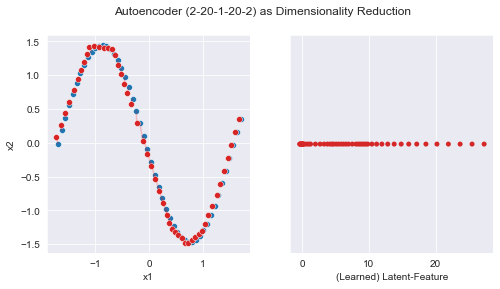

In [65]:
def plot_error_x_y(x1, x2, y1, y2, ax):
    ax.plot([x1, x2], [y1, y2], c='red', alpha=0.2)

x1 = np.arange(50)

df_ex = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
    "x1": x1,
    "x2": np.sin(x1 / 7.5)
})), columns=['x1', 'x2'])

df_ex_encoded = autoencoder.encoder(df_ex.values).numpy()
df_ex_reg = autoencoder.decoder(df_ex_encoded).numpy()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle("Autoencoder (2-20-1-20-2) as Dimensionality Reduction")
sns.scatterplot(data=df_ex, x='x1', y='x2', ax=axes[0])
sns.scatterplot(x=df_ex_reg[:, 0], y=df_ex_reg[:, 1], color=sns.color_palette()[3], ax=axes[0])

for (_, row), x2, y2 in zip(df_ex.iterrows(), df_ex_reg[:, 0], df_ex_reg[:, 1]):
    plot_error_x_y(row['x1'], x2, row['x2'], y2, axes[0])

gfg = sns.stripplot(x=df_ex_encoded, jitter=0, color=sns.color_palette()[3], ax=axes[1])
gfg.set_xlabel("(Learned) Latent-Feature")
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-limit.png'))
plt.show()